In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("datasets/car_data.csv")
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [12]:
dataset.drop(columns=['Car_Name'], axis = 1 ,inplace=True)

In [13]:
print(dataset['Fuel_Type'].unique())
print(dataset['Seller_Type'].unique())
print(dataset['Transmission'].unique())
print(dataset['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


Text(0.5, 1.0, 'Sales data distribution')

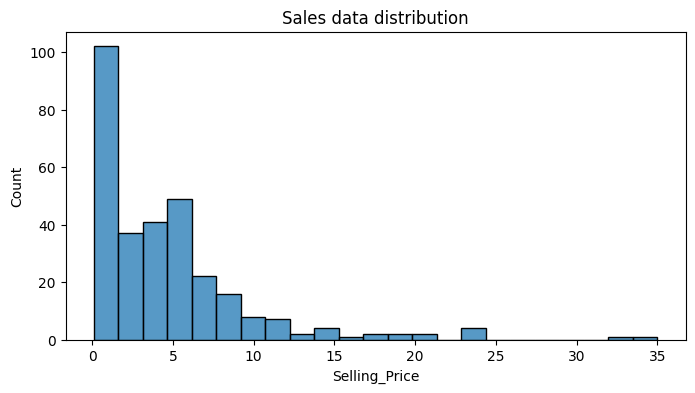

In [14]:
fig=plt.figure(figsize=(8,4))
sns.histplot(dataset['Selling_Price'])
plt.title('Sales data distribution')


In [16]:
# Calculating the how old the car is
dataset['Current_Year']=2024
dataset['Number_Years'] = dataset["Current_Year"] - dataset["Year"]
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Number_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2024,10
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2024,11
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2024,7
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2024,13
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2024,10


In [17]:
# Dropping the Current and Year column
dataset.drop(columns=['Current_Year' ,"Year"],axis= 1 ,inplace=True)
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Selling_Price  301 non-null    float64
 1   Present_Price  301 non-null    float64
 2   Kms_Driven     301 non-null    int64  
 3   Fuel_Type      301 non-null    object 
 4   Seller_Type    301 non-null    object 
 5   Transmission   301 non-null    object 
 6   Owner          301 non-null    int64  
 7   Number_Years   301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [22]:
X = dataset.drop(columns=['Selling_Price'], axis=1)
y = dataset["Selling_Price"]

In [23]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [ ]:
## Pipeline to Convert categorical to numerical and to Normalize

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

In [26]:
# Categorical features
categorical_features = ['Fuel_Type', 'Seller_Type', 'Transmission']

# Numerical features
numeric_features = ['Present_Price', 'Kms_Driven', 'Owner', 'Number_Years']

# Define preprocessing steps for categorical and numerical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())  # One-hot encode categorical variables
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Standardize numerical features
])

# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ])


In [29]:
# Concatenate training and testing data
concatenated_data = pd.concat([X_train, X_test], axis=0)

# Apply the pipeline transformations
transformed_data = preprocessor.fit_transform(concatenated_data)

# Split transformed data back into training and testing sets
X_train_transformed = transformed_data[:len(X_train)]
X_test_transformed = transformed_data[len(X_train):]

## Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
rf_regressor = RandomForestRegressor()

# Fit the model on the training data
rf_regressor.fit(X_train_transformed, y_train)

# Predict on the testing data
y_pred = rf_regressor.predict(X_test_transformed)


### R^2 vs Adjusted R^2

In [32]:
from sklearn.metrics import r2_score
import numpy as np

# Calculate R^2
r2 = r2_score(y_test, y_pred)

# Calculate adjusted R^2
n = X_test_transformed.shape[0]  # Number of samples
p = X_test_transformed.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("R^2:", r2)
print("Adjusted R^2:", adjusted_r2)


R^2: 0.931212939144799
Adjusted R^2: 0.9193901630603113


## Multiple model Testing

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [35]:
models = {
    'SVR': SVR(),
    'LinearRegression': LinearRegression(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor()
}

param_grid = {
    'SVR': {'C': [0.001, 0.01, 0.1, 1], 'kernel': ['linear', 'rbf']},
    'LinearRegression': {'normalize': [True, False]},
    'DecisionTreeRegressor': {'max_depth': [None, 3, 5, 7, 9, 11, 13]},
    'RandomForestRegressor': {'n_estimators': [10, 20, 50, 100, 200], 'max_depth': [None, 3, 5, 10, 20]}
}

results_list = []

# Iterate over models
for model_name, model in models.items():
    if model_name == "LinearRegression":
        continue
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='r2')
    grid_search.fit(X_train_transformed, y_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    results_list.append({'Model': model_name, 'Best_Params': best_params, 'R2_Score': best_score})

# Convert results to DataFrame
results_df = pd.DataFrame(results_list)


In [36]:
results_df

,Model,Best_Params,R2_Score
0,SVR,"{'C': 0.1, 'kernel': 'linear'}",0.833422
1,DecisionTreeRegressor,{'max_depth': None},0.837179
2,RandomForestRegressor,"{'max_depth': None, 'n_estimators': 50}",0.871102


C:\Users\DC\AppData\Local\Temp\ipykernel_7120\3117156399.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2_Score', y='Model', data=results_df, palette='viridis')


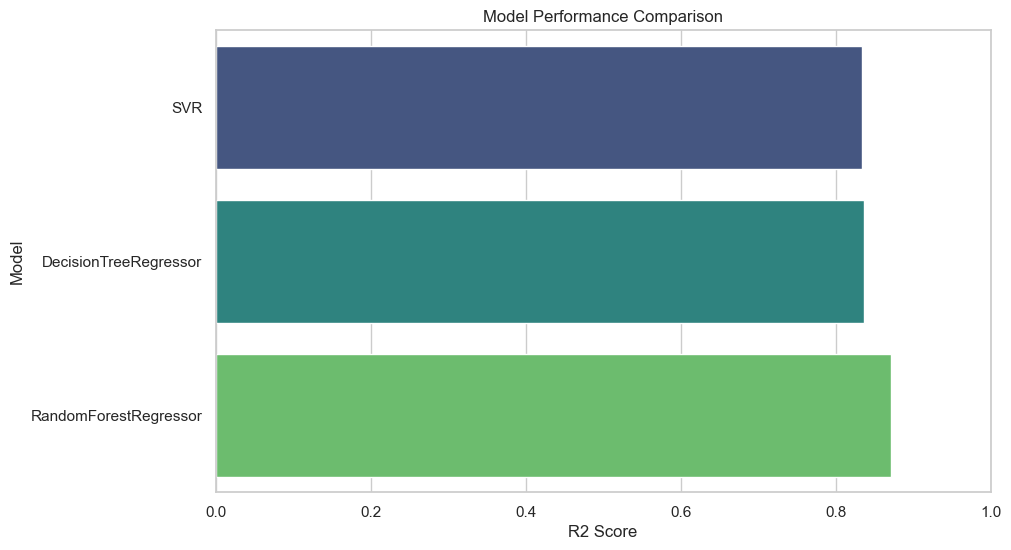

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x='R2_Score', y='Model', data=results_df, palette='viridis')
plt.title('Model Performance Comparison')
plt.xlabel('R2 Score')
plt.ylabel('Model')
plt.xlim(0, 1)  # Set the x-axis range from 0 to 1 for R^2 scores
plt.show()

In [40]:
best_model_name = results_df.loc[results_df['R2_Score'].idxmax(), 'Model']
best_model_params = results_df.loc[results_df['R2_Score'].idxmax(), 'Best_Params']
best_model = models[best_model_name]

# Fitting the best model on the training data
best_model.set_params(**best_model_params)
best_model.fit(X_train_transformed, y_train)

# Evaluating the best model on the testing data
y_pred_test = best_model.predict(X_test_transformed)

# Calculate evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 2.3487587836842114
Mean Absolute Error (MAE): 0.688176315789474
R^2 Score: 0.9300693938735765


In [41]:
dataset.iloc[100]

Selling_Price          1.75
Present_Price           1.9
Kms_Driven             3000
Fuel_Type            Petrol
Seller_Type      Individual
Transmission         Manual
Owner                     0
Number_Years              8
Name: 100, dtype: object

In [43]:
# USer Input
print("Please provide the following information:")
present_price = float(input("Present Price: "))
kms_driven = int(input("Kilometers Driven: "))
fuel_type = input("Fuel Type (Petrol, Diesel, CNG): ").capitalize()
seller_type = input("Seller Type (Dealer, Individual): ").capitalize()
transmission = input("Transmission (Manual, Automatic): ").capitalize()
owner = int(input("Owner: "))
number_years = int(input("Number of Years: "))

# Create a DataFrame with user input
user_input = pd.DataFrame({
    'Present_Price': [present_price],
    'Kms_Driven': [kms_driven],
    'Fuel_Type': [fuel_type],
    'Seller_Type': [seller_type],
    'Transmission': [transmission],
    'Owner': [owner],
    'Number_Years': [number_years]
})

# Preprocess the user input using the same preprocessing steps
user_input_transformed = preprocessor.transform(user_input)

# Make a prediction using the best model
predicted_selling_price = best_model.predict(user_input_transformed)

# Print the predicted selling price
print("Predicted Selling Price:", predicted_selling_price[0])


Please provide the following information:
Predicted Selling Price: 1.6910000000000003
